In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

## Data Collcetion

In [3]:
df = pd.read_csv("/home/prasanth/gas_turbines.csv")

In [4]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
df = df.drop(['AT'], axis=1)
df = df.drop(['AP'], axis=1)

In [6]:
df.head()

,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


## Exploratory Data Analysis

In [7]:
df.shape

(15039, 9)

In [8]:
df.isnull().sum()

AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [9]:
df.describe()

,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


<AxesSubplot:>

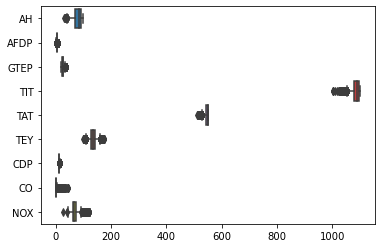

In [10]:
sns.boxplot(data = df, orient = "h")

In [ ]:
sns.catplot('AT', data=df, kind="count",height = 5,aspect = 2)

In [ ]:
X = np.array(df.iloc[:,0:28])
Y = np.array(df.iloc[:,28])

In [10]:
X = scale(X)

## Neural Network Model

In [11]:
from sklearn.neural_network import MLPClassifier

#increasing the hidden layers gives more accuracy
clf = MLPClassifier(activation ='relu',solver='lbfgs', alpha=0.0001,hidden_layer_sizes=(3), random_state=1)
clf.fit(X,Y)

pred_values = clf.predict(X)

In [12]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

confusion_matrix = confusion_matrix(Y,pred_values)
confusion_matrix

array([[134,   5],
       [  5, 373]], dtype=int64)

In [13]:
classification_report = classification_report(Y,pred_values)
print(classification_report)

              precision    recall  f1-score   support

       large       0.96      0.96      0.96       139
       small       0.99      0.99      0.99       378

    accuracy                           0.98       517
   macro avg       0.98      0.98      0.98       517
weighted avg       0.98      0.98      0.98       517



In [14]:
print("Accuracy:",metrics.accuracy_score(Y,pred_values))

Accuracy: 0.9806576402321083
